<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #10: Nube de palabras

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [6]:
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

import re
import pandas as pd 
from pprint import pprint

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import pyLDAvis.gensim_models
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Cargar datos
path = 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [5]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.review_body.apply(lambda texto: pre_procesado(texto))
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,pp
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,buen buena calidad buena presentación
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,producto perfecto salir casa nintendo switch
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,funciona nintendo switch forma emparejarlo pod...
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,recomendado utilizo pc dan ningún problema oye...
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,cable funciona bien podria ser mas largo adapt...


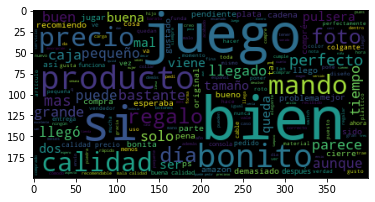

In [7]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

In [82]:
# CARGAR IMAGEN 
img = PIL.Image.open("cloud.png")
# display(img)

mask = np.array(img)

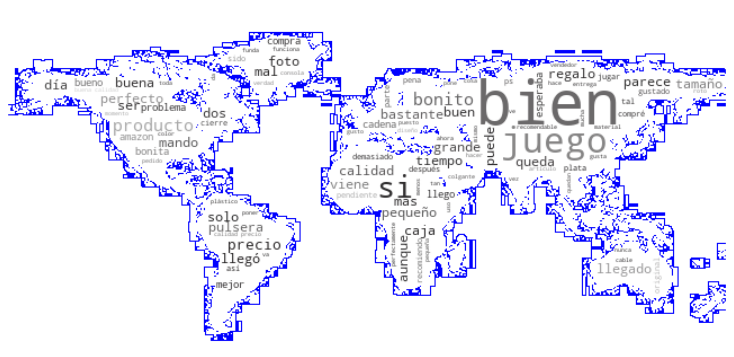

In [83]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="Spectral",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='blue').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

image_colors=ImageColorGenerator(mask)

# wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()